In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    ax.grid()
    plt.ylim(-1, 20)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_areas = 16
fieldsPerArea = 6 #id, posx, posy, color, completed?, #kilo_in_area

num_robot = 24
experiment_time = 1800
num_run = 100

In [17]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_BLUE'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_RED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-06_robots#24_MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_RED'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_BLUE'

In [18]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_BLUE exists


### Area labels

In [19]:
df_area_labels = ['time']
for i in range(0, num_areas*fieldsPerArea, fieldsPerArea):
    # print(i, end=", ")
    df_area_labels += ['id' + str(i // fieldsPerArea), 'posx' + str(i // fieldsPerArea), 'posy' + str(i // fieldsPerArea), 'color' + str(i // fieldsPerArea),
                        'completed' + str(i // fieldsPerArea), 'contained' + str(i // fieldsPerArea)]

## Completed labels

In [20]:
completed_labels = []
for i in range(0, num_areas):
    completed_labels += ['completed' + str(i)]

In [21]:
mean_active_areas_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    mean_active_areas_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("areaLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
#             print('\tfilename: ', filename)
            
            df_meanActiveAreas = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_meanActiveAreas.columns = df_area_labels
#             print(df_elpsTimeot['kID'].values)
            
            mean_active_areas_count += [(df_meanActiveAreas[completed_labels] == 0).sum(axis=1).mean()]
#             print(mean_active_areas_count)
    
    mean_active_areas_dict[str(timeout)+","+str(respawn)] = mean_active_areas_count       


Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#10_NumAreas#16_redAreas#0_1800#seconds
	timeout: 10
	respawn: 10
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#0_1800#seconds
	timeout: 10
	respawn: 30
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#60_NumAreas#16_redAreas#0_1800#seconds
	timeout: 10
	respawn: 60
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#120_NumAreas#16_redAreas#0_1800#seconds
	timeout: 10
	respawn: 120
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#2_respawn#10_NumAreas#16_redAreas#0_1800#seconds
	timeout: 20
	respawn: 10
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#2_respawn#30_NumAreas#16_redAreas#0_1800#seconds
	timeout: 20
	respawn: 30
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#2_respawn#60_NumAreas#16_redAreas#0_1800#seconds
	timeout: 20
	respawn: 60
Timeout folder: TimeoutRespawnEx

In [ ]:
# for i in mean_active_areas_dict.values():
#     print(len(i))

### mixed

mean_active_areas_TimeoutRespawnExp_2021-07-06_robots#24_MIXED


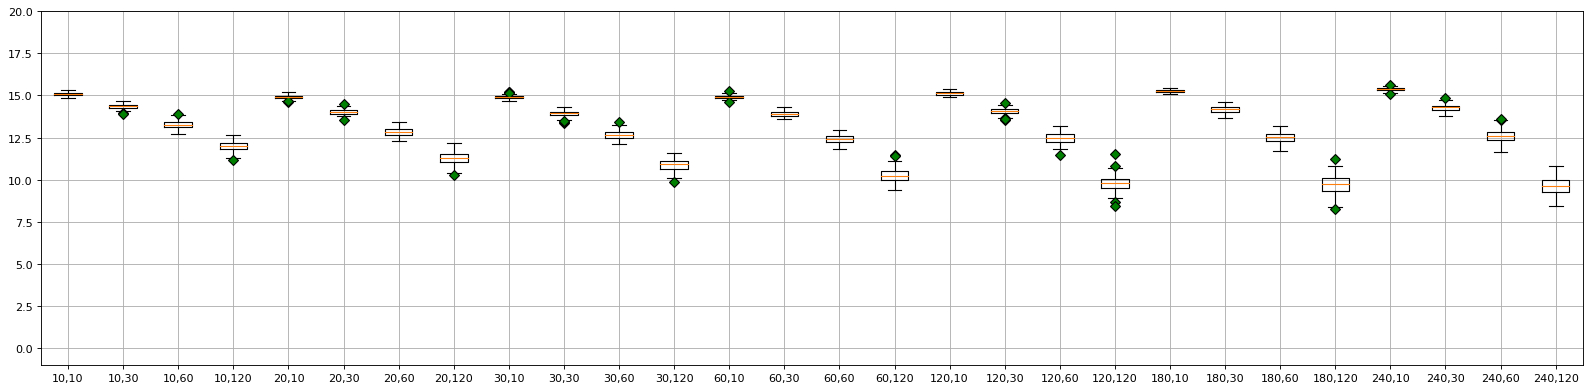

In [10]:
saveFigure = True
figName = "mean_active_areas_"+results_folder.split("/")[-1]
print(figName)
simple_boxplot(mean_active_areas_dict, figName, saveFigure)

### red

mean_active_areas_TimeoutRespawnExp_2021-07-07_robots#24_RED


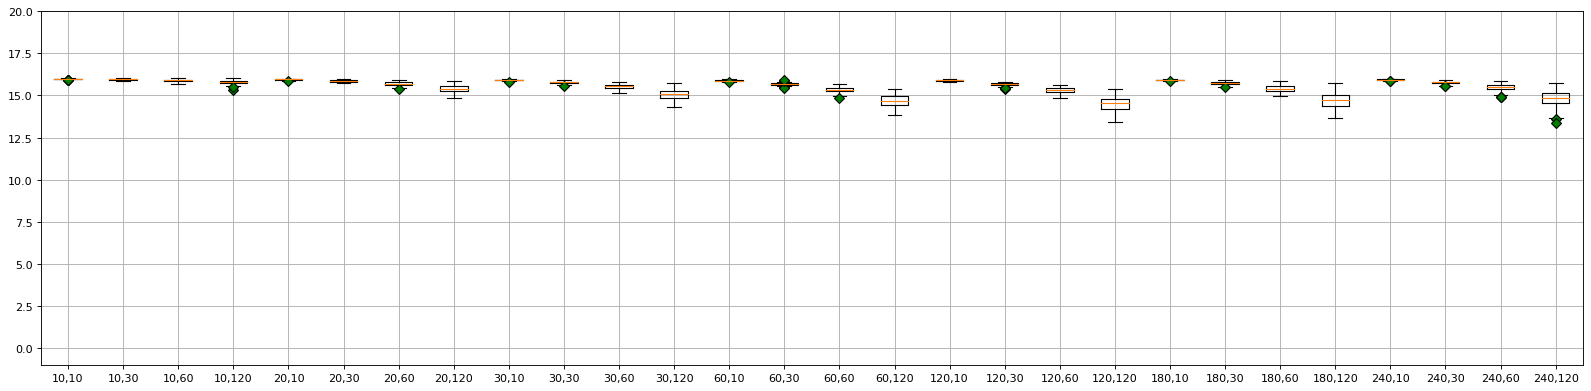

In [16]:
saveFigure = True
figName = "mean_active_areas_"+results_folder.split("/")[-1]
print(figName)
simple_boxplot(mean_active_areas_dict, figName, saveFigure)

### blue

mean_active_areas_TimeoutRespawnExp_2021-07-07_robots#24_BLUE


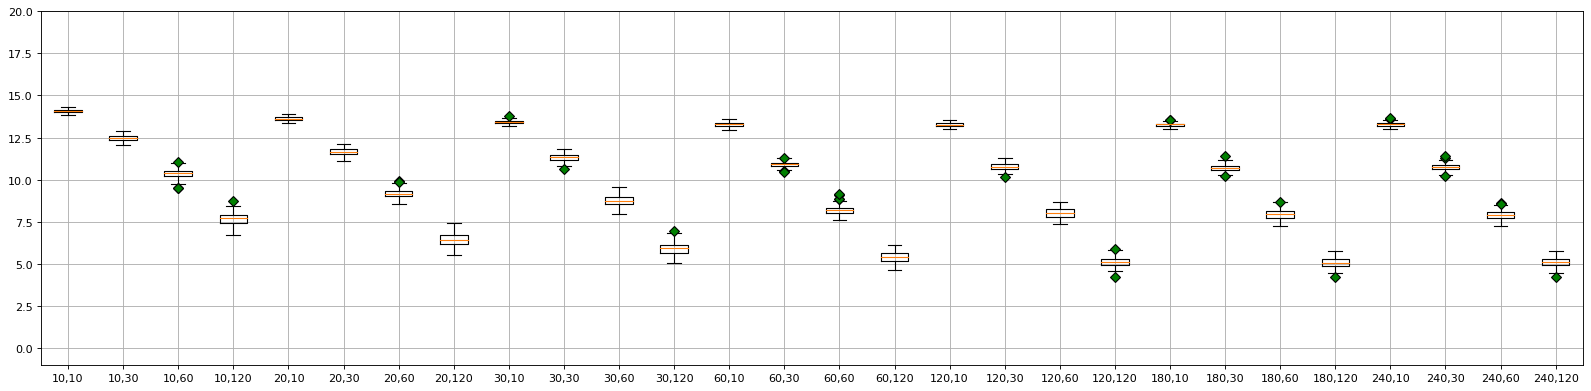

In [25]:
saveFigure = True
figName = "mean_active_areas_"+results_folder.split("/")[-1]
print(figName)
simple_boxplot(mean_active_areas_dict, figName, saveFigure)